In [17]:
from preprocessing import *
from main import *
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [ ]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
htgr_mini = {'depth': 1, 'grid': 5, 'k': 4, 'lamb': 2.63584570163326e-06, 'lamb_entropy': 3.02497466094173, 'lr_1': 0.75, 'lr_2': 1.5, 'steps': 25, 'reg_metric':'edge_backward'}

# load your dataset from preprocessing
dataset = get_htgr(cuda=True)

DEVICE: cuda


In [19]:
# define your NKAN object
htgr_kan = NKAN(dataset, 42, device, htgr_mini)

checkpoint directory created: ./model
saving model version 0.0


In [20]:
# initialize and train your model
model = htgr_kan.get_model(save=True, save_as='HTGR_mini')

| train_loss: 1.27e-02 | test_loss: 1.33e-02 | reg: 2.59e+01 | : 100%|█| 25/25 [00:05<00:00,  4.38it


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 1.81e-02 | test_loss: 1.85e-02 | reg: 2.17e+01 | : 100%|█| 25/25 [00:05<00:00,  4.27it

saving model version 0.3
Model pruned and re-trained.


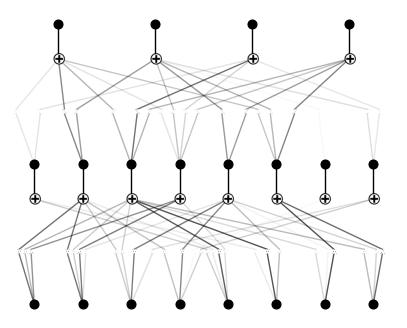

In [21]:
model.plot()

In [22]:
htgr_kan.get_metrics(model, 'HTGR_mini')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,fluxQ1,0.0004,0.1523,0.0,0.0005,0.1905,0.9870
1,fluxQ2,0.0004,0.1476,0.0,0.0005,0.1898,0.9871
2,fluxQ3,0.0003,0.1349,0.0,0.0004,0.1691,0.9898
3,fluxQ4,0.0004,0.1613,0.0,0.0005,0.2033,0.9853


In [23]:
htgr_kan.get_equation(model, 'HTGR_mini_s0', simple=0, metrics=True)

fixing (0,0,0) with 0
fixing (0,0,1) with gaussian, r2=0.9993087973897209, c=3
fixing (0,0,2) with cos, r2=0.9988833321976925, c=2
fixing (0,0,3) with sin, r2=0.9980737025585463, c=2
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,0,6) with 0
fixing (0,0,7) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with gaussian, r2=0.9993465538997137, c=3
fixing (0,1,2) with cos, r2=0.994620797525059, c=2
fixing (0,1,3) with gaussian, r2=0.9978588479138957, c=3
fixing (0,1,4) with gaussian, r2=0.9676801050205937, c=3
fixing (0,1,5) with 0
fixing (0,1,6) with 0
fixing (0,1,7) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with gaussian, r2=0.9992607756365806, c=3
fixing (0,2,2) with gaussian, r2=0.9981526943299482, c=3
fixing (0,2,3) with 0
fixing (0,2,4) with gaussian, r2=0.9998917671192565, c=3
fixing (0,2,5) with 0
fixing (0,2,6) with 0
fixing (0,2,7) with sin, r2=0.9938883000012292, c=2
fixing (0,3,0) with 0
fixing (0,3,1) with gaussian, r2=0.9973056509344257, c=3
fixing (0,3,2) with 0
fixing 

[-0.3068*(-0.0889*sin(6.2624*x_5 - 4.8344) - 0.034*cos(6.7166*x_1 - 3.3536) + 0.0246*cos(5.9826*x_2 - 5.9807) + 1 - 0.0694*exp(-13.0957*(0.5084 - x_8)**2) + 0.2056*exp(-12.4993*(0.4961 - x_6)**2) - 0.0453*exp(-14.6536*(0.4613 - x_3)**2) - 0.0374*exp(-14.623*(0.4588 - x_7)**2))**2 + 0.3949*sin(-0.3544*sin(6.3884*x_5 + 0.7962) + 7.9061 + 0.3009*exp(-14.0283*(0.4337 - x_6)**2)) - 0.1512*tan(-0.043*cos(6.3837*x_8 + 5.8158) + 7.3816 + 0.1212*exp(-10.4453*(0.483 - x_7)**2)) + 0.4433*tan(0.0319*sin(7.1606*x_5 - 3.1754) - 0.1255 + 0.4576*exp(-11.6243*(0.5089 - x_2)**2) - 0.1572*exp(-13.3763*(0.5083 - x_3)**2) - 0.1867*exp(-12.0748*(0.4916 - x_4)**2) + 0.4897*exp(-10.9169*(0.4661 - x_1)**2)) + 0.7383 - 0.1363*exp(-0.82*(0.3867*sin(6.5466*x_1 + 1.8369) - 0.1213*sin(5.4902*x_5 + 7.9578) + 0.2012 - exp(-16.6791*(0.5332 - x_2)**2))**2),
 -0.0579*(0.1321*cos(6.3837*x_8 + 5.8158) - 1 - 0.3722*exp(-10.4453*(0.483 - x_7)**2))**4 + 1.4365*sin(0.1273*sin(6.3703*x_3 + 7.4072) + 0.1902*sin(6.0682*x_4 + 2.3

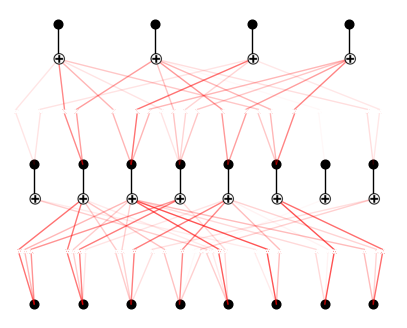

In [24]:
model.plot()